<h1 style="text-align:center">   
      <font color = red >
                🎮 Video Game Sales Visualization With Plotly 🎮  
        </font>    
</h1>
<hr style="width:100%;height:5px;border-width:0;color:gray;background-color:gray">
<center><img src="https://media.giphy.com/media/94DBMnpVEbJLy/giphy.gif"></center>

<center><h1 style ="background: #e60000;border:0;color:white">INTRODUCTION</h1></center><br>
A video game is an electronic game that involves interaction with a user interface or input device – such as a joystick, controller, keyboard, or motion sensing device – to generate visual feedback for a player. This feedback is shown on a video display device, such as a TV set, monitor, touchscreen or virtual reality headset. Video games are often augmented with audio feedback delivered through speakers or headphones, and sometimes with other types of feedback, including haptic technology.
<br>
Video games are defined based on their platform, which include arcade games, console games, and PC games. More recently, the industry has expanded onto mobile gaming through smartphones and tablet computers, virtual and augmented reality systems, and remote cloud gaming. Video games are classified into a wide range of genres based on their type of gameplay and purpose.

<h2 style ="background:#333399;border:0;color:white"><b>Content:</b></h2>
<font color = #333399>  
    
1. [Loading Data and Explanation of Features](#1)
1. [Visualization](#2)
    * [What genre games have been made the most?](#3)
    * [Which year had the most game release?](#4)
    * [Which platform had the most game release?](#5)
    * [What are the top publishers?](#6)
    * [Which genre has the highest sales worldwide?](#7)
    * [Which year had the highest sales worldwide?](#8)
    * [Which platform has the highest sales worldwide?](#9)
    * [Which publisher has the highest sales worldwide?](#10)
    * [What is the region sales by genre?](#11)
    * [What is the region sales by year?](#12)
    * [What is the region sales by platform?](#13)
    * [What is the region sales by publisher?](#14)
    * [Top 1000 Video Games, Release Years, Publishers and Sales](#15)
    * [What is the video game rankings by region?](#16)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from IPython.display import display, HTML

# word cloud library
from wordcloud import WordCloud,ImageColorGenerator

# matplotlib
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a> <br>
<h2 style ="background:#333399;border:0;color:white" >Loading Data and Explanation of Features</h2>

<font color = 'black'>
    
* vgsales includes 10 features that are:

    * <b style ="background:#333399;border:0;color:white"> Rank </b> - Ranking of overall sales
    * <b style ="background:#333399;border:0;color:white">Name </b> - The games name          
    * <b style ="background:#333399;border:0;color:white">Platform</b> - Platform of the games release (i.e. PC,PS4, etc.)     
    * <b style ="background:#333399;border:0;color:white">Year</b> - Year of the game's release              
    * <b style ="background:#333399;border:0;color:white">Genre</b> - Genre of the game                
    * <b style ="background:#333399;border:0;color:white">Publisher</b> - Publisher of the game          
    * <b style ="background:#333399;border:0;color:white">NA_Sales</b> - Sales in North America (in millions)                
    * <b style ="background:#333399;border:0;color:white">EU_Sales</b> - Sales in Europe (in millions)                
    * <b style ="background:#333399;border:0;color:white">JP_Sales</b> - Sales in Japan (in millions)                   
    * <b style ="background:#333399;border:0;color:white">Other_Sales</b> - Sales in the rest of the world (in millions)              
    * <b style ="background:#333399;border:0;color:white">Global_Sales</b> - Total worldwide sales.             

In [3]:
# Load data that we will use.
vgsales = pd.read_csv("../input/videogamesales/vgsales.csv")

In [4]:
# information about vgsales
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
print(vgsales.Genre.value_counts())


Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64


<a id="2"></a> <br>
<h2 style ="background:#333399;border:0;color:white" >Visualization</h2>



<a id="3"></a> <br>
<h2 style ="background:#c0f099;border:0;">What genre games have been made the most?</h2>

In [7]:
vg_genre = vgsales.Genre.value_counts().reset_index()

# create trace1
trace1 = go.Bar(
                x = vg_genre['index'],
                y = vg_genre['Genre'],
                marker = dict(color = 'rgb(192, 240, 153)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'The most have been made games genre ' , xaxis = dict(title = 'Genre'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()



# figure
fig = {
  "data": [
    {
      "values": vg_genre['Genre'],
      "labels": vg_genre['index'],
      "hoverinfo":"label+percent+value",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Genre Analysis",
        "title_x":0.47,     
    }
}
iplot(fig)




<a id="4"></a> <br>
<h2 style ="background:#c08199;border:0;">Which year had the most game release?</h2>

In [8]:
vg_year = vgsales.Year.value_counts().reset_index()
# create trace1
trace1 = go.Bar(
                x = vg_year['index'],
                y = vg_year['Year'],
                marker = dict(color = 'rgb(192, 129, 153)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'Video Game Release by Year' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Number of Games Released'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

<a id="5"></a> <br>
<h2 style ="background:#f8ec7c;border:0;">Which platform had the most game release? </h2>

In [9]:
vg_platform = vgsales.Platform.value_counts().reset_index()
# create trace1
trace1 = go.Bar(
                x = vg_platform['index'],
                y = vg_platform['Platform'],
                marker = dict(color = 'rgb(248, 236, 124)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'Video Game Release by Platform' , xaxis = dict(title = 'Platform'), yaxis = dict(title = 'Number of Games Released'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

<a id="6"></a> <br>
<h2 style ="background:#4894fc;border:0;">What are the top publishers?</h2>

In [10]:
vgpub=  vgsales.groupby('Publisher')['Name'].count().reset_index()
vgpub = vgpub.sort_values('Name',ascending=False).reset_index()
vgpub.drop("index",axis = 1,inplace=True)
print(vgpub)
fig = go.Figure()
fig.add_trace(
    go.Bar(x=vgpub['Publisher'][:10],
           y=vgpub['Name'][:10],
           name="Top 10",
           marker = {'color' : 'rgb(72, 148, 252)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}}))
fig.add_trace(
    go.Bar(x=vgpub['Publisher'][:50],
           y=vgpub['Name'][:50],
           name="Top 50",
           marker = {'color' : 'rgb(72, 148, 252)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}},
           visible=False))
fig.add_trace(
    go.Bar(x=vgpub['Publisher'][:100],
           y=vgpub['Name'][:100],
           name="Top 100",
           marker = {'color' : 'rgb(72, 148, 252)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}},
           visible=False))


fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [True, False,False]},
                           {"title": "Top 10 Publishers"}]),
                dict(label="Top 50",
                     method="update",
                     args=[{"visible": [False,True, False]},
                           {"title": "Top 50 Publishers"}]),
                dict(label="Top 100",
                     method="update",
                     args=[{"visible": [False,False, True]},
                           {"title": "Top 100 Publishers"}]),
                
            ]),
        )
    ])

# Set title
fig.update_layout(template= "plotly_dark",title = 'Top Publishers' , xaxis = dict(title = 'Publishers'), yaxis = dict(title = 'Number of Games Published'))

fig.show()

                        Publisher  Name
0                 Electronic Arts  1351
1                      Activision   975
2              Namco Bandai Games   932
3                         Ubisoft   921
4    Konami Digital Entertainment   832
..                            ...   ...
573                     Playmates     1
574                      Playmore     1
575                        Plenty     1
576                   Pony Canyon     1
577                  SCS Software     1

[578 rows x 2 columns]


<a id="7"></a> <br>
<h2 style ="background:#ff955b;border:0;">Which genre has the highest sales worldwide?</h2>


In [11]:
genre_sales = vgsales.groupby('Genre')['Global_Sales'].sum().reset_index().sort_values("Global_Sales",ascending=False)
print(genre_sales)
fig = px.pie(genre_sales, names='Genre', values='Global_Sales')
fig.update_traces(rotation=90, pull=[0.25,0.07,0.07,0.07,0.07], textinfo="percent+label")
fig.update_layout(title="Video Game Sales by Genre",title_x=0.5)
fig.show()
# create trace1
trace1 = go.Bar(
                x = genre_sales['Genre'],
                y = genre_sales['Global_Sales'],
                marker = dict(color = 'rgb(255, 149, 91)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'Video Game Sales by Genre' , xaxis = dict(title = 'Genre'), yaxis = dict(title = 'Sales'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

           Genre  Global_Sales
0         Action       1751.18
10        Sports       1330.93
8        Shooter       1037.37
7   Role-Playing        927.37
4       Platform        831.37
3           Misc        809.96
6         Racing        732.04
2       Fighting        448.91
9     Simulation        392.20
5         Puzzle        244.95
1      Adventure        239.04
11      Strategy        175.12


<a id="8"></a> <br>
<h2 style ="background:#8773c0;border:0;">Which year had the highest sales worldwide?</h2>

In [12]:
year_sales = vgsales.groupby('Year')['Global_Sales'].sum().reset_index()
# create trace1
trace1 = go.Bar(
                x = year_sales['Year'],
                y = year_sales['Global_Sales'],
                marker = dict(color = 'rgb(135, 115, 192)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'Video Game Sales by Release Year' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Sales'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

<a id="9"></a> <br>
<h2 style ="background:#1a8879;border:0;">Which platform has the highest sales worldwide?</h2>

In [13]:
platform_sales =  vgsales.groupby('Platform')['Global_Sales'].sum().reset_index().sort_values("Global_Sales",ascending=False)

fig = go.Figure()

fig.add_trace(
    go.Bar(x=platform_sales['Platform'][:5],
           y=platform_sales['Global_Sales'][:5],
           name="Top 5",
           marker = {'color' : 'rgb(26, 136, 121)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}}))
fig.add_trace(
    go.Bar(x=platform_sales['Platform'][:10],
           y=platform_sales['Global_Sales'][:10],
           name="Top 10",
           marker = {'color' : 'rgb(26, 136, 121)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}},
           visible=False))
fig.add_trace(
    go.Bar(x=platform_sales['Platform'][:20],
           y=platform_sales['Global_Sales'][:20],
           name="Top 20",
           marker = {'color' : 'rgb(26, 136, 121)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}},
           visible=False))
fig.add_trace(
    go.Bar(x=platform_sales['Platform'],
           y=platform_sales['Global_Sales'],
           name="All",
           marker = {'color' : 'rgb(26, 136, 121)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}},
           visible=False))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 5",
                     method="update",
                     args=[{"visible": [True, False,False,False]},
                           {"title": "Top 5 "}]),
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [False,True, False,False]},
                           {"title": "Top 10"}]),
                dict(label="Top 20",
                     method="update",
                     args=[{"visible": [False,False, True,False]},
                           {"title": "Top 20 "}]),
                
                dict(label="All",
                     method="update",
                     args=[{"visible": [False,False, False,True]},
                           {"title": "All"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(template= "plotly_dark",title = 'Video Game Sales by Platform' , xaxis = dict(title = 'Platforms'), yaxis = dict(title = 'Sales'))

fig.show()

<a id="10"></a> <br>
<h2 style ="background:#c2b2d5;border:0;">Which publisher has the highest sales worldwide?</h2>

In [14]:
pub_sales=  vgsales.groupby('Publisher')['Global_Sales'].sum().reset_index().sort_values('Global_Sales',ascending=False)

fig = go.Figure()

fig.add_trace(
    go.Bar(x=pub_sales['Publisher'][:10],
           y=pub_sales['Global_Sales'][:10],
           name="Top 10",
           marker = {'color' : 'rgb(194, 178, 213)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}}))
fig.add_trace(
    go.Bar(x=pub_sales['Publisher'][:50],
           y=pub_sales['Global_Sales'][:50],
           name="Top 50",
           marker = {'color' : 'rgb(194, 178, 213)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}},
           visible=False))
fig.add_trace(
    go.Bar(x=pub_sales['Publisher'][:100],
           y=pub_sales['Global_Sales'][:100],
           name="Top 100",
           marker = {'color' : 'rgb(194, 178, 213)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}},
           visible=False))
fig.add_trace(
    go.Bar(x=pub_sales['Publisher'],
           y=pub_sales['Global_Sales'],
           name="All",
           marker = {'color' : 'rgb(194, 178, 213)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}},
           visible=False))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [True, False,False,False]},
                           {"title": "Top 10 "}]),
                dict(label="Top 50",
                     method="update",
                     args=[{"visible": [False,True, False,False]},
                           {"title": "Top 50"}]),
                dict(label="Top 100",
                     method="update",
                     args=[{"visible": [False,False, True,False]},
                           {"title": "Top 100 "}]),
                dict(label="All",
                     method="update",
                     args=[{"visible": [False,False,False,True]},
                           {"title": "All"}]),
                
            ]),
        )
    ])

# Set title
fig.update_layout(template= "plotly_dark",title = 'Video Game Sales by Publisher' , xaxis = dict(title = 'Publishers'), yaxis = dict(title = 'Sales'))

fig.show()

<a id="11"></a> <br>
<h2 style ="background:#b08879;border:0;">What is the region sales by genre?</h2>

In [15]:
year =  vgsales.groupby('Year')['Name'].count().reset_index().sort_values("Name",ascending=False)
year = year.reset_index()
year.drop("index",axis = 1,inplace=True)  

genre = vgsales['Genre'].unique()
genres = sorted(genre)

In [16]:
na_sales = []
eu_sales = []
jp_sales = []
other_sales = []
global_sales = []

for i in genres:
    v=vgsales[vgsales.Genre==i]
    na_sales.append(v.NA_Sales.sum())
    eu_sales.append(v.EU_Sales.sum())
    jp_sales.append(v.JP_Sales.sum())
    other_sales.append(v.Other_Sales.sum())
    

In [17]:
fig = go.Figure()
fig.add_trace(go.Bar(x=na_sales,
                     y=genres,
                     name='North America Sales',                     
                     orientation='h'))
fig.add_trace(go.Bar(x=eu_sales,
                     y=genres,
                     name='Europe Sales',                    
                     orientation='h'))
fig.add_trace(go.Bar(x=jp_sales,
                     y=genres,
                     name='Japan Sales',                   
                     orientation='h'))
fig.add_trace(go.Bar(x=other_sales,
                     y=genres,
                     name='Other Region Sales',                  
                     orientation='h'))
fig.update_layout(template= "plotly_dark",title_text='Region Sales by Genre',xaxis_title="Sales",yaxis_title="Genre",
                  barmode='stack')
fig.show()

In [18]:
fig = go.Figure()
    
fig.add_trace(go.Scatter(
    x=genres, 
    y=na_sales, 
    name='North America Sales',
    mode='lines+markers',
))
fig.add_trace(go.Scatter(
    x=genres, 
    y=eu_sales, 
    name='Europe Sales',
    mode='lines+markers',
))
fig.add_trace(go.Scatter(
    x=genres, 
    y=jp_sales, 
    name='Japan Sales',
    mode='lines+markers',
))
fig.add_trace(go.Scatter(
    x=genres, 
    y=other_sales,
    name='Other Region Sales',
    mode='lines+markers',
))
fig.update_layout(template= "plotly_dark",title="Total sales by genre")
fig.update_xaxes(type='category')
fig.show()

<a id="12"></a> <br>
<h2 style ="background:#98a3ff;border:0;">What is the region sales by year?</h2>

In [19]:
years = [2008.0, 2009.0, 2007.0, 2010.0, 2006.0]
na_sales = []
eu_sales = []
jp_sales = []
other_sales = []
global_sales = []

for y in years:
    v=vgsales[vgsales.Year==y]
    na_sales.append(v.NA_Sales.sum())
    eu_sales.append(v.EU_Sales.sum())
    jp_sales.append(v.JP_Sales.sum())
    other_sales.append(v.Other_Sales.sum())


In [20]:
tna=vgsales.groupby('Year')['NA_Sales'].sum().reset_index().sort_values("Year",ascending=True)
teu=vgsales.groupby('Year')['EU_Sales'].sum().reset_index().sort_values("Year",ascending=True)
tjp=vgsales.groupby('Year')['JP_Sales'].sum().reset_index().sort_values("Year",ascending=True)
tot=vgsales.groupby('Year')['Other_Sales'].sum().reset_index().sort_values("Year",ascending=True)

In [21]:
fig = go.Figure()
fig.add_trace(go.Bar(x=na_sales,
                     y=years,
                     name='North America Sales',                     
                     orientation='h'))
fig.add_trace(go.Bar(x=eu_sales,
                     y=years,
                     name='Europe Sales',                    
                     orientation='h'))
fig.add_trace(go.Bar(x=jp_sales,
                     y=years,
                     name='Japan Sales',                   
                     orientation='h'))
fig.add_trace(go.Bar(x=other_sales,
                     y=years,
                     name='Other Region Sales',                  
                     orientation='h'))
fig.update_layout(template= "plotly_dark",title_text='Region Sales by Highest Sales Year',xaxis_title="Sales",yaxis_title="Year",
                  barmode='stack')
fig.show()

In [22]:
# Creating trace1
trace1 = go.Scatter(
                    x = tna.Year,
                    y = tna.NA_Sales,
                    mode = "lines",
                    name = "North America",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))
# Creating trace2
trace2 = go.Scatter(
                    x = teu.Year,
                    y = teu.EU_Sales,
                    mode = "lines",
                    name = "Europe",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))
# Creating trace3
trace3 = go.Scatter(
                    x = tjp.Year,
                    y = tjp.JP_Sales,
                    mode = "lines",
                    name = "Japan",
                    marker = dict(color = 'rgba(241, 27, 61, 0.8)'))
# Creating trace4
trace4 = go.Scatter(
                    x = tot.Year,
                    y = tot.Other_Sales,
                    mode = "lines",
                    name = "Other",
                    marker = dict(color = 'rgba(241, 236, 28, 0.8)'))
data = [trace1, trace2,trace3,trace4]
layout = dict(title = '',
              xaxis= dict(title= 'Year',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Total Sales',ticklen= 5,zeroline= False),
              template= "plotly_dark"
             )
fig = dict(data = data, layout = layout)
iplot(fig)

<a id="13"></a> <br>
<h2 style ="background:#9cfefa;border:0;">What is the region sales by platform?</h2>

In [23]:
na_sales = vgsales.groupby('Platform')['NA_Sales'].sum().reset_index().sort_values('NA_Sales',ascending=False)
na_sales = na_sales[:5]

eu_sales = vgsales.groupby('Platform')['EU_Sales'].sum().reset_index().sort_values('EU_Sales',ascending=False)
eu_sales = eu_sales[:5]

jp_sales = vgsales.groupby('Platform')['JP_Sales'].sum().reset_index().sort_values('JP_Sales',ascending=False)
jp_sales = jp_sales[:5]

other_sales = vgsales.groupby('Platform')['Other_Sales'].sum().reset_index().sort_values('Other_Sales',ascending=False)
other_sales = other_sales[:5]

In [24]:
fig = go.Figure()

fig.add_trace(
    go.Bar(y=na_sales['NA_Sales'],
           x=na_sales['Platform'],
           name="North America",
          marker = {'color' : 'rgb(156, 254, 250)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}}))
fig.add_trace(
    go.Bar(y=eu_sales['EU_Sales'],
           x=eu_sales['Platform'],
           name="Europe",
           marker = {'color' : 'rgb(156, 254, 250)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}},
           visible=False))
fig.add_trace(
    go.Bar(x=jp_sales['Platform'],
           y=jp_sales['JP_Sales'],
           name="Japan",
           marker = {'color' : 'rgb(156, 254, 250)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}},
           visible=False))
fig.add_trace(
    go.Bar(x=other_sales['Platform'],
           y=other_sales['Other_Sales'],
           name="Others",
           marker = {'color' : 'rgb(156, 254, 250)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}},
           visible=False))
fig.add_trace(
    go.Bar(x=platform_sales['Platform'][:5],
           y=platform_sales['Global_Sales'][:5],
           name="Gloabal",
           marker = {'color' : 'rgb(156, 254, 250)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}},
           visible=False))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 5 Platform for North America"}]),
                dict(label="Europe",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 5 Platform for Europe"}]),
                dict(label="Japan",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 5 Platform for Japan"}]),
                dict(label="Others",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 5 Platform for Other Region"}]),
                dict(label="Global",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "Top 5 Platform for Global"}]),
            ]),
        )
    ])

fig.update_layout(template= "plotly_dark",title_text="Region sales by platform",xaxis_domain=[0.05, 1.0])
fig.show()

<a id="14"></a> <br>
<h2 style ="background:#b2251f;border:0;">What is the region sales by publisher?</h2>

In [25]:
na_sales = vgsales.groupby('Publisher')['NA_Sales'].sum().reset_index().sort_values('NA_Sales',ascending=False)
na_sales = na_sales[:5]

eu_sales = vgsales.groupby('Publisher')['EU_Sales'].sum().reset_index().sort_values('EU_Sales',ascending=False)
eu_sales = eu_sales[:5]

jp_sales = vgsales.groupby('Publisher')['JP_Sales'].sum().reset_index().sort_values('JP_Sales',ascending=False)
jp_sales = jp_sales[:5]

other_sales = vgsales.groupby('Publisher')['Other_Sales'].sum().reset_index().sort_values('Other_Sales',ascending=False)
other_sales = other_sales[:5]

In [26]:
fig = go.Figure()

fig.add_trace(
    go.Bar(x=na_sales['Publisher'],
           y=na_sales['NA_Sales'],
           name="North America",
          marker = {'color' : 'rgb(178, 37, 31)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}}))
fig.add_trace(
    go.Bar(x=eu_sales['Publisher'],
           y=eu_sales['EU_Sales'],   
           name="Europe",
           marker = {'color' : 'rgb(178, 37, 31)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}},
           visible=False))
fig.add_trace(
    go.Bar(x=jp_sales['Publisher'],
           y=jp_sales['JP_Sales'],
           name="Japan",
           marker = {'color' : 'rgb(178, 37, 31)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}},
           visible=False))
fig.add_trace(
    go.Bar(x=other_sales['Publisher'],
           y=other_sales['Other_Sales'],
           name="Others",
           marker = {'color' : 'rgb(178, 37, 31)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}},
           visible=False))
fig.add_trace(
    go.Bar(x=pub_sales['Publisher'][:5],
           y=pub_sales['Global_Sales'][:5],
           name="Gloabal",
           marker = {'color' : 'rgb(178, 37, 31)',
                              'line' :{'color' :'rgb(0,0,0)','width' :1.5}},
           visible=False))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 5 Platform for North America"}]),
                dict(label="Europe",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 5 Platform for Europe"}]),
                dict(label="Japan",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 5 Platform for Japan"}]),
                dict(label="Others",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 5 Platform for Other Region"}]),
                dict(label="Global",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "Top 5 Platform for Global"}]),
            ]),
        )
    ])
,
fig.update_layout(template= "plotly_dark",title_text="Region sales by publisher",xaxis_domain=[0.05, 1.0])
fig.show()

<a id="15"></a> <br>
<h2 style ="background:#c86e43;border:0;">Top 1000 Video Games, Release Years, Publishers and Sales</h2>

In [27]:
vg1000=vgsales.iloc[:1000,:]

In [28]:
vg1000["normalizesales"] = (vg1000["Global_Sales"] - np.min(vg1000["Global_Sales"]))/(np.max(vg1000["Global_Sales"])-np.min(vg1000["Global_Sales"]))

In [29]:
vg1000.Rank=vg1000.Rank.astype("str")
vg1000.Global_Sales=vg1000.Global_Sales.astype("str")
trace1 = go.Scatter3d(
    y=vg1000["Publisher"],
    x=vg1000["Year"],
    z=vg1000["normalizesales"],
    text="Name:"+ vg1000.Name +","+" Rank:" + vg1000.Rank + " Global Sales: " + vg1000["Global_Sales"] +" millions",
    mode='markers',
    marker=dict(
        size=vg1000['NA_Sales'],
        color = vg1000['normalizesales'],
        colorscale = "Rainbow",
        colorbar = dict(title = 'Global Sales'),
        line=dict(color='rgb(200, 110, 67)'),
       
    )
)

data=[trace1]

layout=go.Layout(height=800, width=800, title='Top 1000 Video Games, Release Years, Publishers and Sales',
            titlefont=dict(color='rgb(20, 24, 54)'),
            scene = dict(xaxis=dict(title='Year',
                                    titlefont=dict(color='rgb(20, 24, 54)')),
                            yaxis=dict(title='Publisher',
                                       titlefont=dict(color='rgb(20, 24, 54)')),
                            zaxis=dict(title='Global Sales',
                                       titlefont=dict(color='rgb(20, 24, 54)')),
                            bgcolor = 'whitesmoke'
                           ))
 
fig=go.Figure(data=data, layout=layout)
iplot(fig)

<a id="16"></a> <br>
<h2 style ="background:#fddcc6;border:0;">What is the video game rankings by region?</h2>

In [30]:
na_games = vgsales.groupby('NA_Sales')['Name'].sum().reset_index().sort_values('NA_Sales',ascending=False)
na_games = na_games[:5]

eu_games = vgsales.groupby('EU_Sales')['Name'].sum().reset_index().sort_values('EU_Sales',ascending=False)
eu_games = eu_games[:5]

jp_games = vgsales.groupby('JP_Sales')['Name'].sum().reset_index().sort_values('JP_Sales',ascending=False)
jp_games = jp_games[:5]

other_games = vgsales.groupby('Other_Sales')['Name'].sum().reset_index().sort_values('Other_Sales',ascending=False)
other_games = other_games[:5]

In [31]:
trace1= go.Bar(y=na_games['NA_Sales'],
               x=na_games['Name'],
               name="North America",
               marker={'color': na_games['NA_Sales'],'colorscale': 'Earth'})

trace2= go.Bar(y=eu_games['EU_Sales'],
               x=eu_games['Name'],
               name="Europe",
               marker={'color': eu_games['EU_Sales'],'colorscale': 'Earth'})

trace3= go.Bar(y=jp_games['JP_Sales'],
               x=jp_games['Name'],
               name="Japan",
               marker={'color': jp_games['JP_Sales'],'colorscale': 'Earth'})


trace4=go.Bar(y=other_games['Other_Sales'],
              x=other_games['Name'],
              name="Other",
              marker={'color': other_games['Other_Sales'],'colorscale': 'Earth'})


layout=dict(template="plotly_dark",height=600, width=800, title_text="Video game rankings by region")

fig = make_subplots(
    rows=2, cols=2, subplot_titles=("North America", "Europe", "Japan","Other"),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [ {"type": "bar"}, {"type": "bar"}]])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout'].update(layout)
fig.show()

<a id="17"></a> <br>
<h2 style ="background:#3e61d4;border:0;">Genre WordCloud</h2>

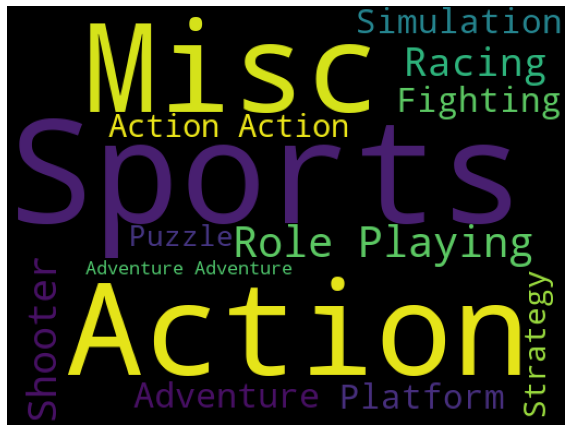

In [32]:
# data prepararion
genre=vgsales['Genre']
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='black',
                          width=512,
                          height=384
                         ).generate(" ".join(genre))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

<a id="18"></a> <br>
<h2 style ="background:#aa75d4;border:0;">Platform WordCloud</h2>

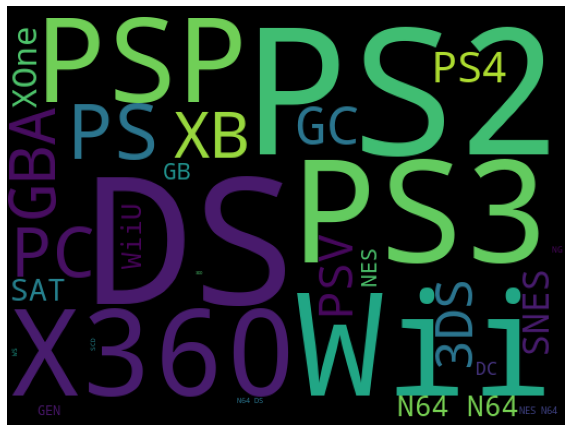

In [33]:
# data prepararion
platform=vgsales['Platform']
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='black',
                          width=512,
                          height=384
                         ).generate(" ".join(platform))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

## If you like the notebook please upvote
<center><img src="https://media.giphy.com/media/13qctMBrrgbwJi/giphy.gif"></center>
